<a href="https://colab.research.google.com/github/saadghojaria55/Auto_ML/blob/main/Model_Interpretability_Saad_Ghojaria_002129718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install shap

In [4]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Found existing installation: h2o 3.36.1.1
Uninstalling h2o-3.36.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h2o-3.36.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h2o/*
Proceed (y/n)?   ERROR: Operation cancelled by user
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [5]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [6]:
url = "/content/drive/MyDrive/song_data.csv"
drive.mount('/content/drive')
df=pd.read_csv(url)
X=df.iloc[:,2:-1]
y=df.iloc[:,1:2]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
catagorical_features = ['audio_mode']


### 1.Fit a linear model and interpret the regression coefficients

After Completing linear regression on the model of song dataset we got to know Dependant Variable is **Song Popularity**. The coeffiecent of each and every feature was defined in reg.summary() where we can see highest coefficient value is Loudness whereas lowest is speechiness with value of -0.04

In [8]:
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [9]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [10]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


train MAE = 16.959, test MAE = 18.73 


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [11]:
reg.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     50.72
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          2.65e-120
Time:                        03:04:00   Log-Likelihood:                -75883.
No. Observations:               16951   AIC:                         1.518e+05
Df Residuals:                   16938   BIC:                         1.519e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               52.5367      0.273    192.302      0.000      52.001      53.072
song_duration_ms    -0.0561      0.167     -0.336      0.737      -0.383       0.271
acousticness        -1.9726      0.227     -8.699      0.000      -2.417      -1.528
danceability         0.9185      0.179      5.122      0.000       0.567       1.270
energy              -3.9358      0.293    -13.410      0.000      -4.511      -3.360
instrumentalness    -1.6470      0.181     -9.098      0.000      -2.002      -1.292
key                 -0.2235      0.166     -1.347      0.178      -0.549       0.102
liveness            -0.6202      0.168     -3.698      0.000      -0.949      -0.291
loudness             3.1584      0.276     11.455      0.000       2.618       3.699
speechiness         -0.0445      0.171     -0.261      0.794      -0.379       0.290
tempo               -0.4184      0.169     -2.481      0.013      -0.749      -0.088
time_signature       0.4350      0.167      2.602      0.009       0.107       0.763
audio_mode           0.0400      0.348      0.115      0.908      -0.641       0.721
==============================================================================
Omnibus:                      814.135   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              933.624
Skew:                          -0.572   Prob(JB):                    1.85e-203
Kurtosis:                       2.891   Cond. No.                         4.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Fit a tree-based model and interpret the nodes. <br>
With the help of Random Forest Model Regressor. We can see that as per Random Forest also Loundess is maximum valued variable but here least valued variable is Time Signature.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
catagorical_features = ['audio_mode']

In [13]:
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train MAE = 4.613, test MAE = 11.281 


<BarContainer object of 12 artists>

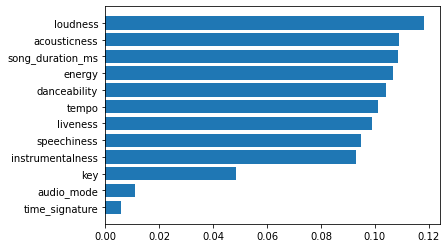

In [14]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])


### 3.  Use auto ml to find the best model

As per AutoML DRF is the best Model.

In [15]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [17]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [18]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:23764 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy2kvrc3x
  JVM stdout: /tmp/tmpy2kvrc3x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy2kvrc3x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:23764
Connecting to H2O server at http://127.0.0.1:23764 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_eyudm1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [19]:
url = "/content/drive/MyDrive/song_data.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
df['churn_bit'] = df['song_popularity'].asnumeric()


Rows:18833
Cols:16




,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,churn_bit
type,enum,int,int,real,real,real,real,int,real,real,int,real,real,int,real,int
mins,,0.0,12000.0,1.02e-06,0.0,0.00107,0.0,0.0,0.0109,-38.768,0.0,0.0,0.0,0.0,0.0,0.0
mean,,52.99553974406624,218213.93394573362,0.25853325622895984,0.6333354165560454,0.6449665077258002,0.07800134884033351,5.289598045983115,0.17966188605108055,-7.447779164232999,0.62809961238252,0.1020927096054798,121.07396187543145,3.959114320607444,0.5279598099081398,52.99553974406624
maxs,,100.0,1799346.0,0.996,0.987,0.999,0.997,11.0,0.986,1.585,1.0,0.941,242.318,5.0,0.984,100.0
sigma,,21.903758102607654,59890.15209519732,0.2887172340963566,0.15672517264874103,0.214094569947863,0.22159666092674765,3.614542545488745,0.14398739991400542,3.827876542453302,0.4833248319923484,0.10437963825464319,28.71548387623507,0.29854842346733057,0.2446431184005412,21.903758102607654
zeros,,272,0,0,2,0,7150,2181,0,0,7004,2,2,3,2,272
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520000000000001,0.496,0.682,2.94e-05,8.0,0.0589,-4.095,1.0,0.0294,167.06,4.0,0.474,73.0
1,In The End,66.0,216933.0,0.0103,0.542,0.853,0.0,3.0,0.108,-6.407,0.0,0.0498,105.256,4.0,0.37,66.0
2,Seven Nation Army,76.0,231733.0,0.00817,0.737,0.463,0.447,0.0,0.255,-7.827999999999999,1.0,0.0792,123.881,4.0,0.324,76.0


In [21]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [22]:
# Set the features and target
X=df.columns
# Set target and predictor variables
y ='song_popularity'
y_numeric ='churn_bit'
X.remove(y)
X.remove(y_numeric) 
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
aml.train(x=X,y=y,training_frame=df_train)      
print(aml.leaderboard)
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20220425_30510,17.8435,318.391,13.3696,nan,318.391
StackedEnsemble_BestOfFamily_2_AutoML_1_20220425_30510,17.8704,319.35,13.3906,nan,319.35
StackedEnsemble_BestOfFamily_1_AutoML_1_20220425_30510,18.3273,335.89,13.9945,0.733359,335.89
GBM_4_AutoML_1_20220425_30510,18.4768,341.392,14.1229,0.739151,341.392
DRF_1_AutoML_1_20220425_30510,18.5426,343.829,13.6463,0.732294,343.829
GBM_1_AutoML_1_20220425_30510,18.9246,358.141,14.6136,0.75011,358.141
GBM_3_AutoML_1_20220425_30510,18.9407,358.749,14.7699,0.748384,358.749
GBM_2_AutoML_1_20220425_30510,19.1688,367.443,15.0326,0.752509,367.443
XGBoost_1_AutoML_1_20220425_30510,19.4023,376.449,14.006,nan,376.449
XGBoost_2_AutoML_1_20220425_30510,19.4358,377.751,14.7881,nan,377.751


In [23]:
best_model.algo

'gbm'

As per [Ref Notebook](https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb) 

1. No specific method to define feature importance that is model agnostic
2. For a given sample, why does the prediction have that value? <br>
Answer: Shap values



###4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.
 
1) First we will do intuition of model interpretation. <br>
2) Plot each SHAP values of each variables.<br>
3) 


In [24]:
url = "/content/drive/MyDrive/song_data.csv"
drive.mount('/content/drive')
df=pd.read_csv(url)
X=df.iloc[:,2:-1]
y=df.iloc[:,1:2]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False) #split Data
catagorical_features = ['audio_mode'] #define categorical data
numerical_features = [c for c in X_train.columns if c not in catagorical_features] #define numerical data and exclude categorical data
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),     #concat simple imputer and original encoder 
              OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)    # maps data with categorical and numerical data
reg = LinearRegression()                            # Linear regression 
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)        # pipeling shap X_train and y_train


In [26]:
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[0])
nan_frame

,audio_mode,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
import numpy
base_value = numpy.round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): [52.537]


In [28]:
X_test.iloc[0: 1]

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature
16951,249304,0.579,0.542,0.468,0.104,10,0.112,-7.796,1,0.0265,130.829,4


In [29]:
sample_prediction = numpy.round(pipeline.predict(X_test.iloc[0: 1])[0], 3)

print(f"Current Prediction: {sample_prediction}, Actual value: {y_test.iloc[0]}")

Current Prediction: [52.654], Actual value: song_popularity    60
Name: 16951, dtype: int64


How did we get from 52.654 to 60?

[Ref Notebook points]<br>
Find this by adjusting individual feature values. But this can be hard to look at<br>
Fast way to visualize is with Partial Dependency Plots (which uses Shap values for individual samples)<br>
Shap values assign a contributing factor to every feature of every sample

### Partial Dependence Plots

In [30]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 1885it [18:57,  1.65it/s]


In [31]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

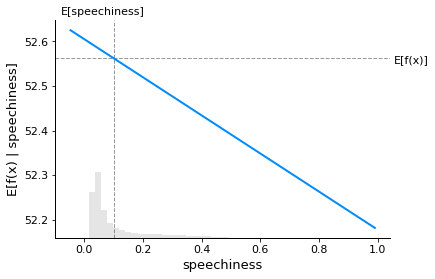

In [32]:
partial_dependence_plot('speechiness')

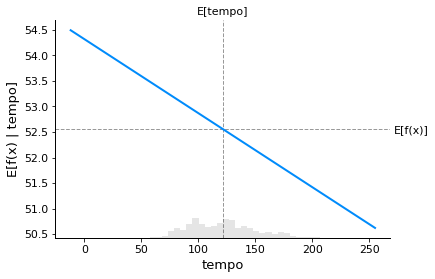

In [33]:
partial_dependence_plot('tempo')

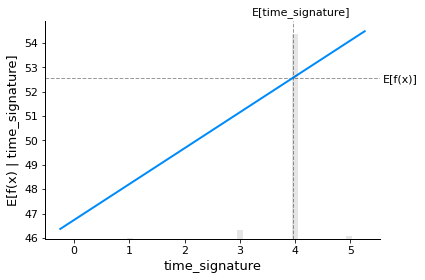

In [34]:
partial_dependence_plot('time_signature')

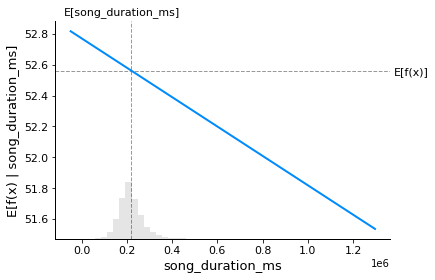

In [35]:
partial_dependence_plot('song_duration_ms')

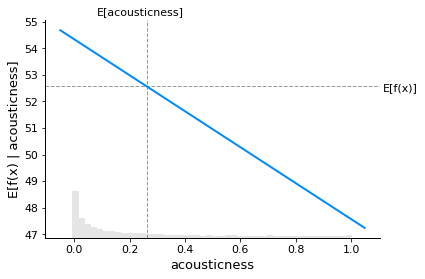

In [36]:
partial_dependence_plot('acousticness')

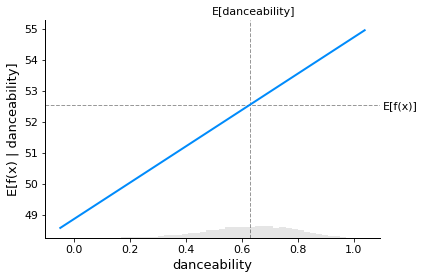

In [37]:
partial_dependence_plot('danceability')

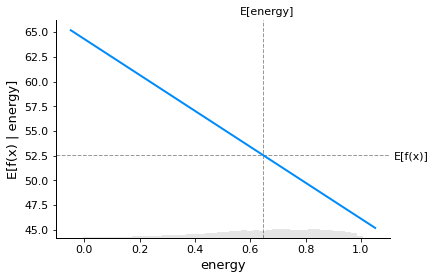

In [38]:
partial_dependence_plot('energy')

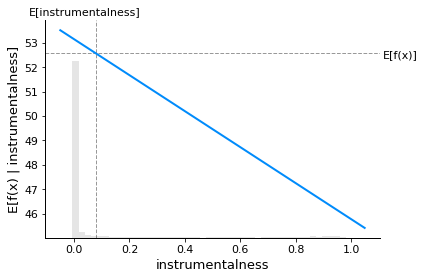

In [39]:
partial_dependence_plot('instrumentalness')

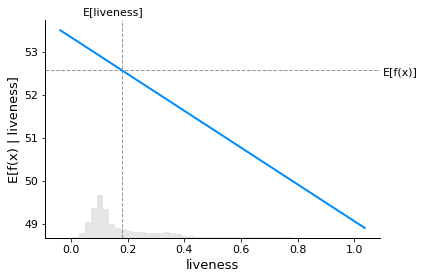

In [40]:
partial_dependence_plot('liveness')

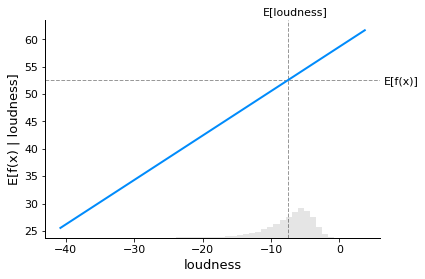

In [41]:
partial_dependence_plot('loudness')

Shap Plots


In [42]:
shap.initjs()

In [43]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [44]:
sample_feature_importance(0, 'condensed')

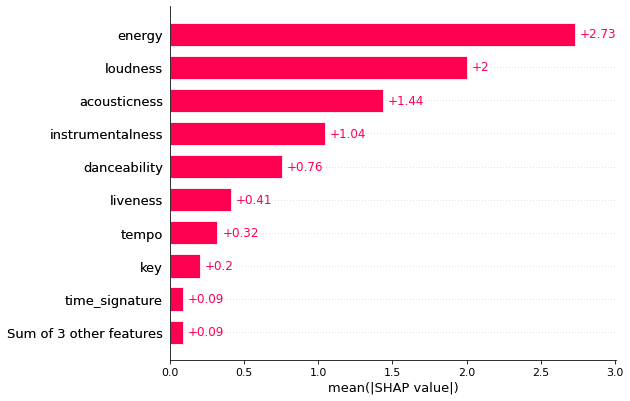

In [45]:
shap.plots.bar(shap_values)

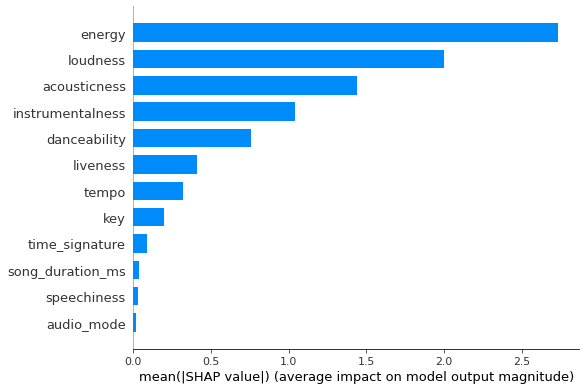

In [46]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

In [47]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim
preprocessed_X_train = mapper.fit_transform(X_train)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] 
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(preprocessed_X_train.values[start:end]))
        y_batch = Variable(torch.FloatTensor(y_train.values[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, torch.unsqueeze(y_batch,dim=1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0: 
        print("Epoch {}, Loss: {}".format(epoch, running_loss))
        
preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
preprocessed_X_train = mapper.transform(X_train)
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

Using a target size (torch.Size([50, 1, 1])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch 0, Loss: 361132.7856826782
Epoch 10, Loss: 164232.85814285278
Epoch 20, Loss: 163551.1446685791
Epoch 30, Loss: 162953.4578781128
Epoch 40, Loss: 162592.70498657227

train MAE = 16.914, test MAE = 18.522 


### Conclusion
We this notebook we can see that linear regression , neural netowork ,autoML  values we conclude that Loudness is most valuable variable. But as Shap Values says Energy is more valuable variable than loudness.

We can now see how [Shap](https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail) works with the data and gives us efficient value despite of any algorithm.

## Licensing and Citation Shap
Shap (April 2022). Shap, Python module version 3.10.0.8. <br>
Copyright (c) 2022 Author Saad Ghojaria.

